In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data loaded successfully.
Dataset Shape: (284807, 31)
Dataset Columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.25

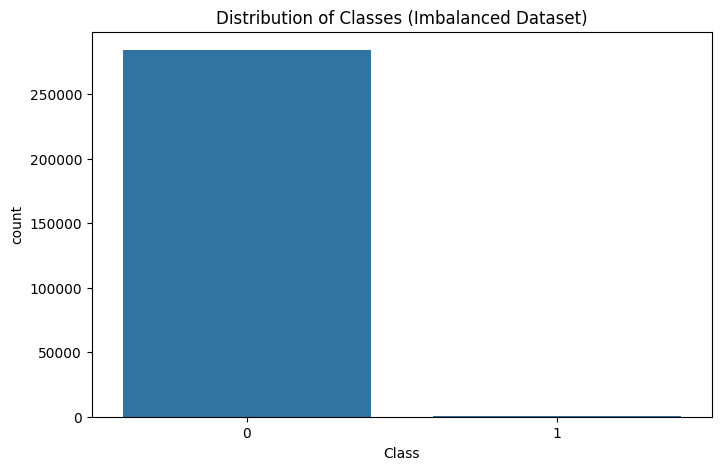

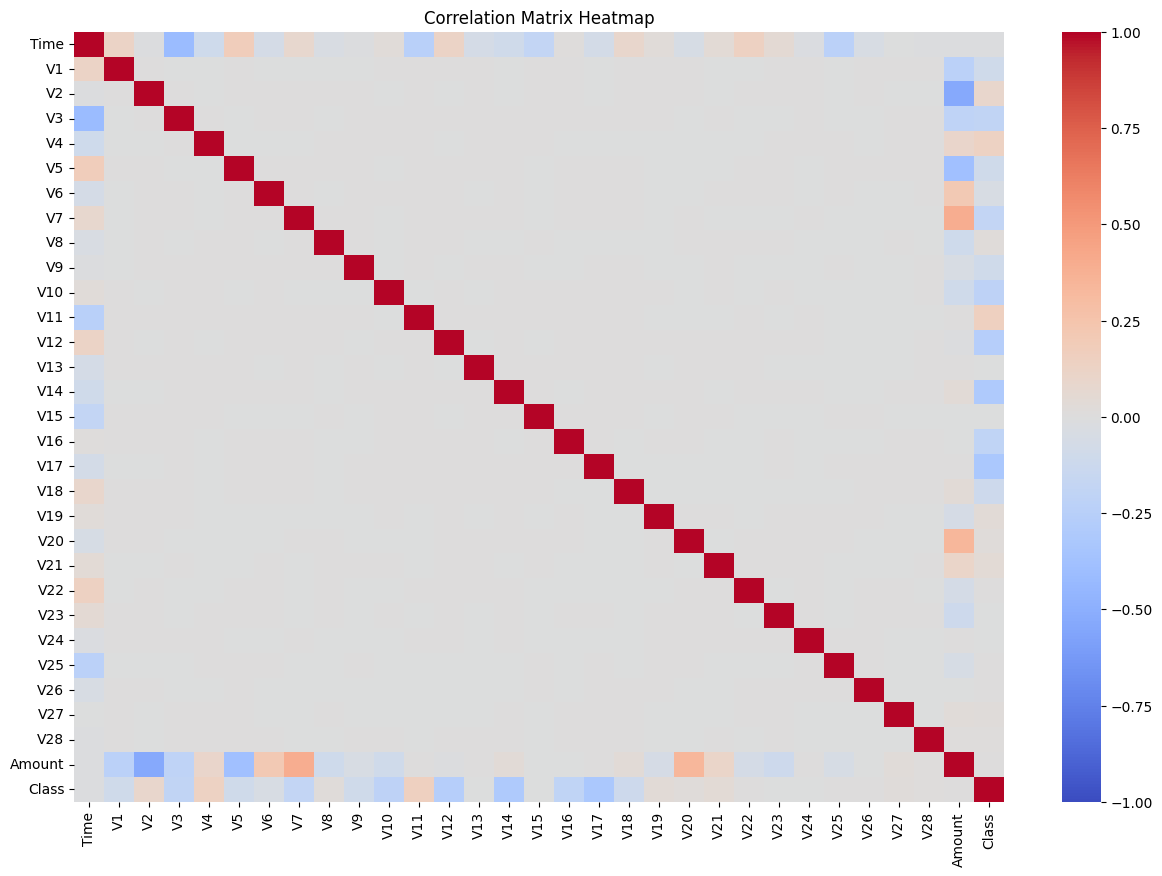

Shape of features (X_scaled): (284807, 30)
Shape of target (y): (284807,)
Class distribution in y_train before resampling:
Class
0    199020
1       344
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `

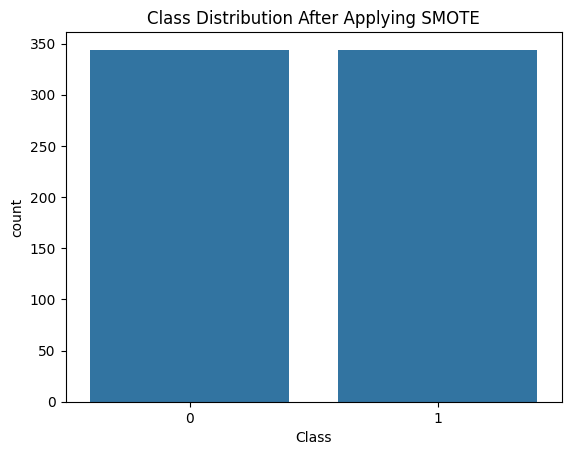

Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Random Forest Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_

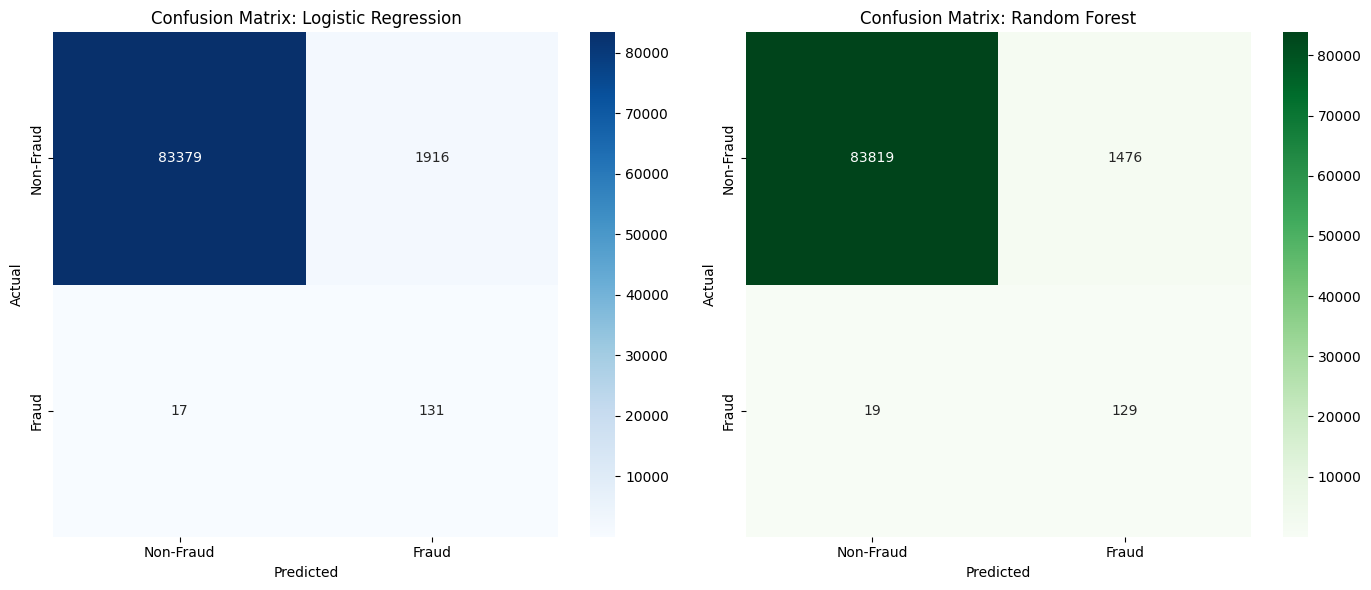

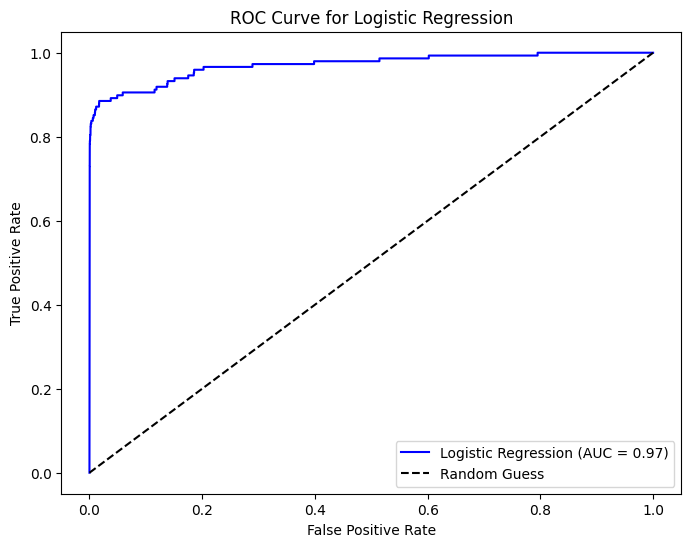

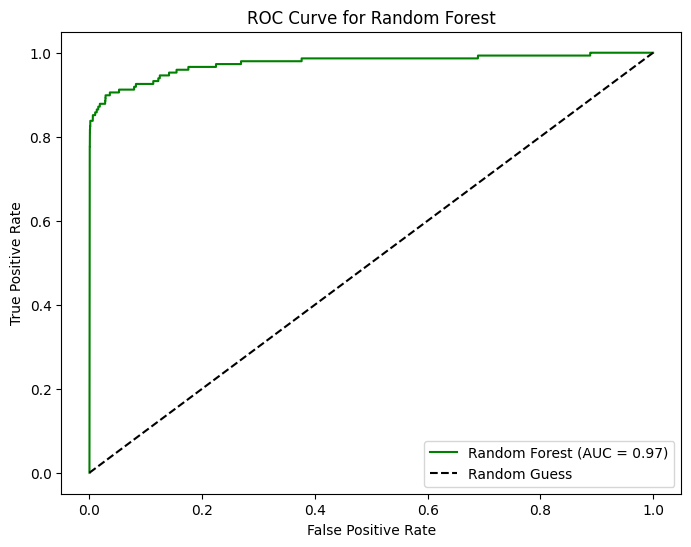

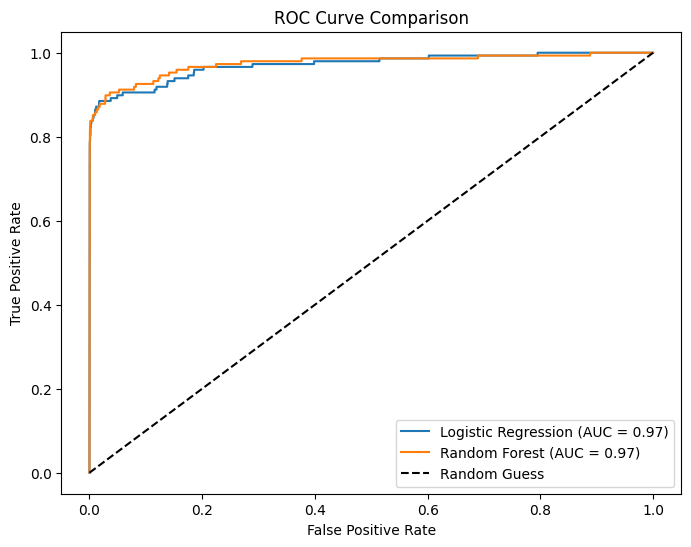

Logistic Regression ROC-AUC: 0.97
Random Forest ROC-AUC: 0.97


In [4]:
# === SETUP: Load Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler

# === Load Data with Error Handling ===
try:
    data = pd.read_csv('/content/creditcard.csv', on_bad_lines='skip')  # Skip malformed rows
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Verify dataset structure
print(f"Dataset Shape: {data.shape}")
print(f"Dataset Columns: {data.columns}")
print(data.head())

# === Check for Missing Values ===
missing_values = data.isnull().sum()
if missing_values.any():
    print(f"Missing Values Found:\n{missing_values}")
    data = data.dropna()  # Drop rows with missing values
    print("Missing values removed.")

# === Visualizing the Data ===
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Classes (Imbalanced Dataset)')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt='.2f', vmin=-1.0, vmax=1.0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# === Data Preprocessing ===
# Define features and target
X = data.drop(['Class'], axis=1)
y = data['Class']

# Ensure no NaN in target variable
if y.isnull().sum() > 0:
    print("NaN values detected in target variable. Dropping affected rows...")
    data = data.dropna(subset=['Class'])
    X = data.drop(['Class'], axis=1)
    y = data['Class']

# Scale 'Time' and 'Amount' only
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Verify shapes of X and y
print("Shape of features (X_scaled):", X_scaled.shape)
print("Shape of target (y):", y.shape)

# === Train-Test Split ===
# Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# === Balancing the Dataset Using RandomUnderSampler and SMOTE ===
# Check class distribution before resampling
print("Class distribution in y_train before resampling:")
print(y_train.value_counts())

# RandomUnderSampler to balance classes initially
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# SMOTE to further balance the dataset
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_resampled, y_train_resampled)

# Visualizing balanced data
sns.countplot(x=y_train_bal)
plt.title("Class Distribution After Applying SMOTE")
plt.show()

# === Model Training and Evaluation ===

# Logistic Regression Baseline
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_bal, y_train_bal)
y_pred_log = logreg.predict(X_test)

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log))

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))

# === Hyperparameter Tuning for Random Forest ===
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train_bal, y_train_bal)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Random Forest Report")
print(classification_report(y_test, y_pred_best_rf))

# === Visualizations ===
# Confusion Matrix for Logistic Regression and Random Forest

def plot_two_confusion_matrices(y_true, y_pred1, y_pred2, labels1, labels2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Logistic Regression Confusion Matrix
    cm1 = confusion_matrix(y_true, y_pred1)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    axes[0].set_title(f"Confusion Matrix: {labels1}")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    # Random Forest Confusion Matrix
    cm2 = confusion_matrix(y_true, y_pred2)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=axes[1],
                xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    axes[1].set_title(f"Confusion Matrix: {labels2}")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

# Predictions
plot_two_confusion_matrices(
    y_test, y_pred_log, y_pred_best_rf, labels1="Logistic Regression", labels2="Random Forest")

# === ROC-AUC for Logistic Regression ===
y_prob_log = logreg.predict_proba(X_test)[:, 1]  # Use logistic regression model's probabilities
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# === ROC-AUC for Random Forest ===
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# === Separate ROC Curves ===

# Logistic Regression ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Random Forest ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Plot both Logistic Regression and Random Forest ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Print AUC for both models
print(f"Logistic Regression ROC-AUC: {roc_auc_log:.2f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.2f}")
